# imports

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

In [27]:
import seaborn as sns

plt.style.use("dark_background")
sns.set_palette("muted")

# data import

In [4]:
# Only run first time with new data to concatenate into one df

!cat results/generator*/results.jsonl > results_combined.jsonl
!wc -l results_combined.jsonl

5670 results_combined.jsonl


In [5]:
data = pd.read_json("results_combined.jsonl", lines=True)

In [6]:
data.groupby("predictor").count()["id"]

predictor
claude-2         1890
gpt-3.5-turbo    1890
gpt-4            1890
Name: id, dtype: int64

# order bias

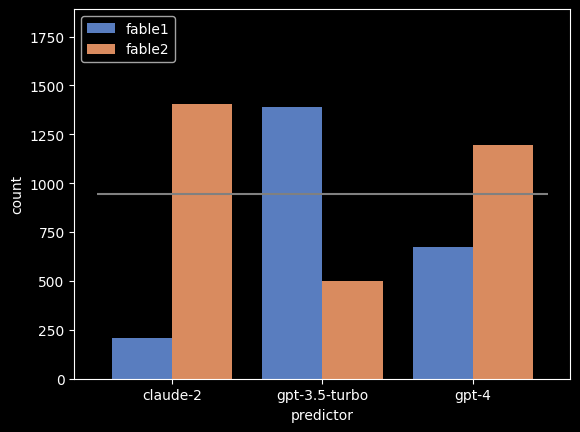

In [28]:
sns.countplot(
    x="predictor",  # x variable name
    # y="correct",       # y variable name
    hue="prediction",  # group variable name
    hue_order=["fable1", "fable2"],
    data=data.dropna()[
        data.dropna().correct_prediction.str.startswith("fable")
    ],  # dataframe to plot
    # kind="bar",
)
plt.hlines(0.5 * 1890, *plt.gca().get_xlim(), "grey")
plt.ylim(0, 1890)
plt.legend(loc="upper left")

# accuracies

## grouped only by predictor

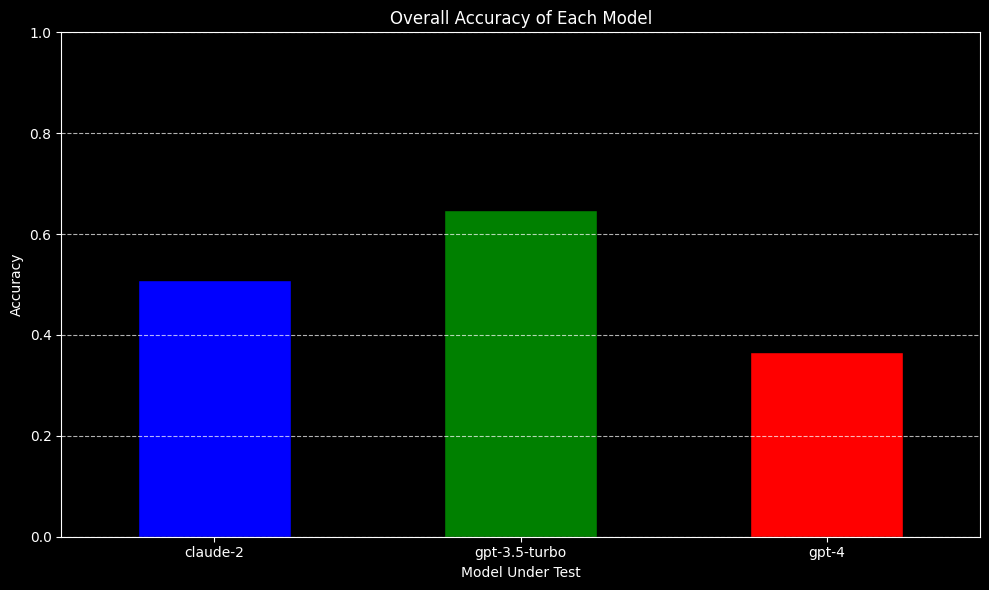

In [47]:
# Calculate overall accuracy for each LLM tested
overall_accuracies = data.groupby("predictor")["correct"].mean()

# Calculate the number of trials for each LLM
n = data.groupby("predictor").size()

# Compute the standard error for Bernoulli trials (very small, not really needed)
# standard_error = (overall_accuracies * (1 - overall_accuracies) / n) ** 0.5

# Plotting overall accuracy with error bars
plt.figure(figsize=(10, 6))
overall_accuracies.plot(kind="bar", color=["blue", "green", "red"], edgecolor="black")
plt.title("Overall Accuracy of Each Model")
plt.xlabel("Model Under Test")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

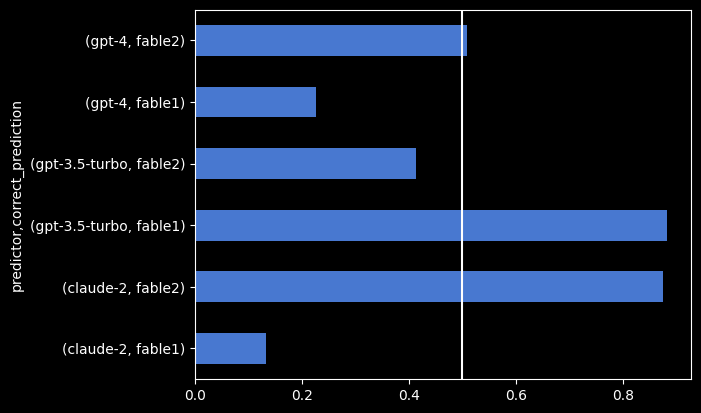

In [48]:
# Calculate overall accuracy for each LLM tested
overall_accuracies = (
    data.dropna()[data.dropna().correct_prediction.str.startswith("fable")]
    .groupby(["predictor", "correct_prediction"])["correct"]
    .mean()
)
overall_accuracies.plot(kind="barh")
plt.vlines(0.5, *plt.gca().get_ylim())

## ... also by test type

<Axes: xlabel='predictor'>

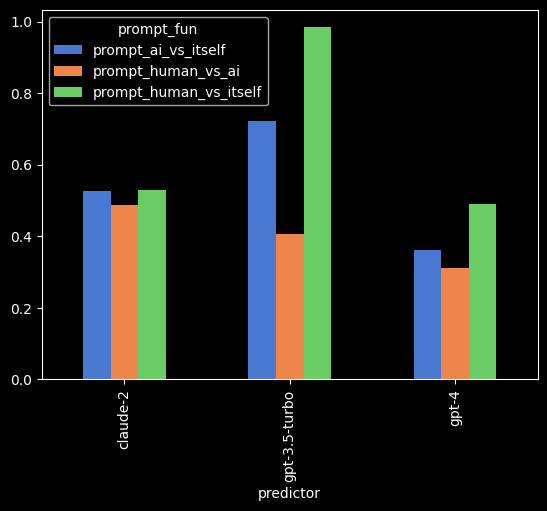

In [ ]:
accuracy_by_test_type = (
    data.groupby(["predictor", "prompt_fun"])["correct"].mean().unstack()
)
accuracy_by_test_type.plot(kind="bar")

## ... also by comparison-category

In [16]:
data["comparison"] = data.apply(
    lambda row: "\nvs ".join(sorted([row.generator1, row.generator2])), axis="columns"
)
data

,id,fable_id,fable1,fable2,prediction_raw,generator1,generator2,prediction,correct,predictor,prompt_fun,correct_prediction,comparison
0,757,1,"A badger, crossing a bridge over a river with ...",A hungry fox was stalking a rabbit one sunny a...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2,claude-2\nvs human
1,758,2,"A magpie dying of thirst saw a jug, and hoping...",A young fox lived in a forest that was experie...,I'm afraid I don't actually have enough conte...,human,claude-2,None,NaN,claude-2,prompt_human_vs_itself,None,claude-2\nvs human
2,759,3,"A middle-aged man, whose hair had started gray...",A fox decided to host a grand feast and invite...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2,claude-2\nvs human
3,760,4,Two neighbours came before Zeus and asked him ...,A lazy fox spent his days sleeping in the shad...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2,claude-2\nvs human
4,761,5,Some storks chose a field newly sown with whea...,The fox came upon the rabbit nibbling carrots ...,"I apologize, I do not actually have enough co...",human,claude-2,None,NaN,claude-2,prompt_human_vs_itself,None,claude-2\nvs human
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,374,185,"Once, a naive frog befriended a cunning snake ...",A sick bull was lying in a quiet corner of the...,"{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1,gpt-4\nvs human
5666,375,186,"A small mouse, living comfortably in an unnoti...","""Little shrub, why donâ€™t you do as I do and ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1,gpt-4\nvs human
5667,376,187,"Once, a squirrel who had shared countless wint...","One evening, a goatherd was driving his flock ...","{""my_fable"": ""Fable2""}",gpt-4,human,fable2,0.0,gpt-4,prompt_human_vs_itself,fable1,gpt-4\nvs human
5668,377,188,"Once upon a time, a proud lion, refusing to hu...","The lumberjack had felled an old redwood and, ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1,gpt-4\nvs human


/home/jason/dev/acs/TuringMirror/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


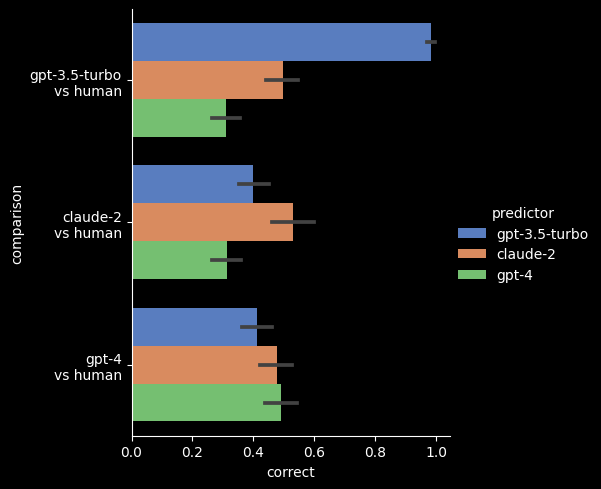

In [38]:
sns.catplot(
    data=data,
    hue="predictor",
    hue_order=["gpt-3.5-turbo", "claude-2", "gpt-4"],
    y="comparison",
    x="correct",
    kind="bar",
    order=[
        "gpt-3.5-turbo\nvs human",
        "claude-2\nvs human",
        "gpt-4\nvs human",
        # "claude-2\nvs gpt-3.5-turbo",
        # "claude-2\nvs gpt-4",
        # "gpt-3.5-turbo\nvs gpt-4",
    ],
    # order=["category1", "category2", "category3"]  # Add your desired order of categories here
)

/home/jason/dev/acs/TuringMirror/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


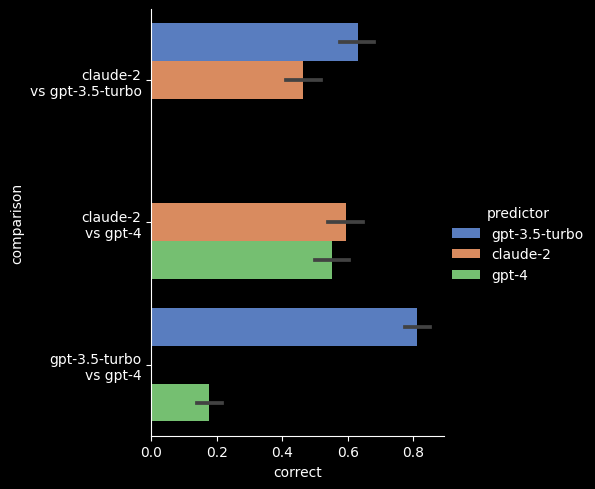

In [41]:
sns.catplot(
    data=data,
    hue="predictor",
    hue_order=["gpt-3.5-turbo", "claude-2", "gpt-4"],
    y="comparison",
    x="correct",
    kind="bar",
    order=[
        # "gpt-3.5-turbo\nvs human",
        # "claude-2\nvs human",
        # "gpt-4\nvs human",
        "claude-2\nvs gpt-3.5-turbo",
        "claude-2\nvs gpt-4",
        "gpt-3.5-turbo\nvs gpt-4",
    ],
    # order=["category1", "category2", "category3"]  # Add your desired order of categories here
)

# tables

In [28]:
# data.dropna().groupby(["predictor", "prediction", "correct_prediction", ])["prediction"].agg(["count"])
data.dropna().groupby(
    [
        "predictor",
        "prompt_fun",
    ]
)[
    "correct"
].agg(["mean"])

mean
predictor     prompt_fun                      
claude-2      prompt_ai_vs_itself     0.526003
              prompt_human_vs_ai      0.486772
              prompt_human_vs_itself  0.530928
gpt-3.5-turbo prompt_ai_vs_itself     0.722222
              prompt_human_vs_ai      0.406085
              prompt_human_vs_itself  0.984127
gpt-4         prompt_ai_vs_itself     0.361559
              prompt_human_vs_ai      0.310847
              prompt_human_vs_itself  0.489418

In [30]:
data["contains_gpt35"] = (data.generator1 == "gpt-3.5-turbo") | (
    data.generator2 == "gpt-3.5-turbo"
)

In [31]:
data.dropna().groupby(
    [
        "predictor",
        "prompt_fun",
        "contains_gpt35",
    ]
)[
    "correct"
].agg(["mean"])

mean
predictor     prompt_fun             contains_gpt35          
claude-2      prompt_ai_vs_itself    False           0.594340
                                     True            0.464789
              prompt_human_vs_ai     False           0.476190
                                     True            0.497354
              prompt_human_vs_itself False           0.530928
gpt-3.5-turbo prompt_ai_vs_itself    True            0.722222
              prompt_human_vs_ai     False           0.406085
              prompt_human_vs_itself True            0.984127
gpt-4         prompt_ai_vs_itself    False           0.551630
                                     True            0.175532
              prompt_human_vs_ai     False           0.312169
                                     True            0.309524
              prompt_human_vs_itself False           0.489418

In [19]:
data.dropna().groupby(
    [
        "contains_gpt35",
        "predictor",
        "prompt_fun",
    ]
)[
    "correct"
].agg(["mean", "std"])

mean       std
contains_gpt35 predictor     prompt_fun                                
False          claude-2      prompt_ai_vs_itself     0.594340  0.491793
                             prompt_human_vs_ai      0.476190  0.500095
                             prompt_human_vs_itself  0.530928  0.500334
               gpt-3.5-turbo prompt_human_vs_ai      0.406085  0.491426
               gpt-4         prompt_ai_vs_itself     0.552486  0.497926
                             prompt_human_vs_ai      0.529412  0.500979
                             prompt_human_vs_itself  0.470120  0.500104
True           claude-2      prompt_ai_vs_itself     0.464789  0.499463
                             prompt_human_vs_ai      0.497354  0.500656
               gpt-3.5-turbo prompt_ai_vs_itself     0.722222  0.448200
                             prompt_human_vs_itself  0.984127  0.125150
               gpt-4         prompt_ai_vs_itself     0.140078  0.347745
                             prompt_human_vs_ai      0.491379  0.502095

In [38]:
data.dropna()

,id,fable_id,fable1,fable2,prediction_raw,generator1,generator2,prediction,correct,predictor,prompt_fun,correct_prediction
0,757,1,"A badger, crossing a bridge over a river with ...",A hungry fox was stalking a rabbit one sunny a...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
2,759,3,"A middle-aged man, whose hair had started gray...",A fox decided to host a grand feast and invite...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
3,760,4,Two neighbours came before Zeus and asked him ...,A lazy fox spent his days sleeping in the shad...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
5,762,6,A farmer covered his wheat field with nets in ...,It was a sunny day in the forest. A flock of b...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
6,763,7,"The horse and the moose had a fight, so the ho...",A young dove wanted to find a mate. She let th...,"{""my_fable"": ""Fable2""}",human,claude-2,fable2,1.0,claude-2,prompt_human_vs_itself,fable2
...,...,...,...,...,...,...,...,...,...,...,...,...
5665,374,185,"Once, a naive frog befriended a cunning snake ...",A sick bull was lying in a quiet corner of the...,"{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1
5666,375,186,"A small mouse, living comfortably in an unnoti...","""Little shrub, why donâ€™t you do as I do and ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1
5667,376,187,"Once, a squirrel who had shared countless wint...","One evening, a goatherd was driving his flock ...","{""my_fable"": ""Fable2""}",gpt-4,human,fable2,0.0,gpt-4,prompt_human_vs_itself,fable1
5668,377,188,"Once upon a time, a proud lion, refusing to hu...","The lumberjack had felled an old redwood and, ...","{""my_fable"": ""Fable1""}",gpt-4,human,fable1,1.0,gpt-4,prompt_human_vs_itself,fable1


# confusion matrices

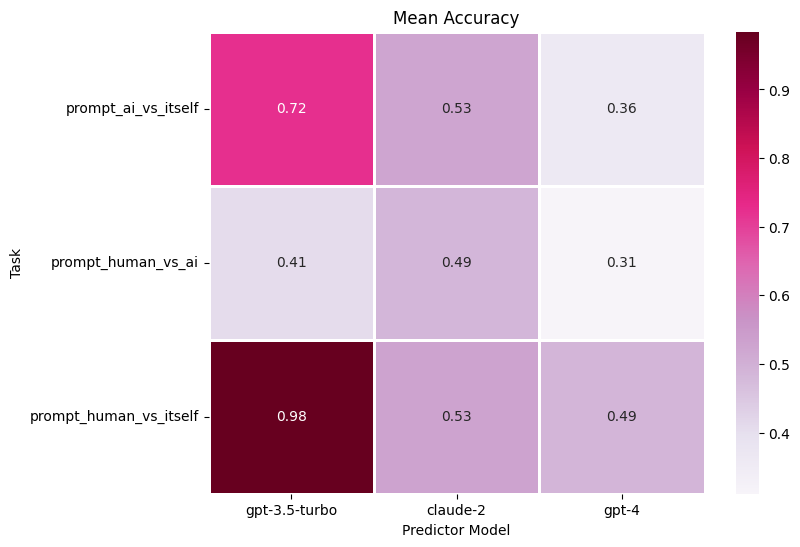

In [66]:
# import seaborn as sns

# Calculate mean accuracy
heatmap_data = (
    data.dropna()
    .groupby(["prompt_fun", "predictor"])["correct"]
    .agg(["mean"])
    .unstack()
    .fillna(0)
)
heatmap_data.columns = heatmap_data.columns.droplevel(0)

# Reorder columns in order of "model age"
column_order = ["gpt-3.5-turbo", "claude-2", "gpt-4"]
heatmap_data = heatmap_data[column_order]

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="PuRd", cbar=True, linewidths=1)
plt.title("Mean Accuracy")
plt.xlabel("Predictor Model")
plt.ylabel("Task")
plt.savefig(
    "/Users/matthewlutz/Downloads/TuringMirror/heatmap-mean-accuracies.png",
    bbox_inches="tight",
    format="png",
    dpi=300,
)
plt.show()